#     Plot correlation comparisons of aircraft and model data

## Setup imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import notebook_prepare as pre

## Define plotting function

In [2]:
def plot_correlations(df,plotdir,key,label) :

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    alt_data = df['Altitude'][:]
    a_min, a_avg, a_max, m_min, m_avg, m_max, bl_min, bl_avg, bl_max = pre.read_data_values(df)

    # Plot the data.
    plt.scatter(a_avg,m_avg,s=200,c=alt_data)

    # Plot a 1:1 agreement line.
    min = np.nanmin([np.nanmin(a_avg),np.nanmin(m_avg)])
    max = np.nanmax([np.nanmax(a_avg),np.nanmax(m_avg)])
    plt.plot([min,max],[min,max],lw=5,ls='dashed',c='grey')

##    # Add a shaded region represention aircraft data below a value of 1.
##    # This is used to represent SO2 data below 1ppb which is below the limit of detection.
##    ymin,ymax = ax.get_ylim()
##    xmin,xmax = ax.get_xlim()
##    plt.fill_betweenx([ymin,ymax],[xmin,xmin],[1,1],ec=None,fc='black',alpha=0.2)

    # Set the axes labels.
    plt.xlabel('Aircraft '+label,fontsize=50,labelpad=10)
    plt.ylabel('Model '+label,fontsize=50,labelpad=10)

    # Set the axes ticks.
    ax.tick_params(labelsize=30)

    # Plot the colourbar.
    cb = plt.colorbar(ax=ax,orientation='vertical',shrink=0.8,pad=0.05,extend='both')
    cb.ax.tick_params(labelsize=25)
    cb.set_label('Altitude / m',fontsize=30,labelpad=10)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Correlation.png')
    #plt.close()

## Specify the flight number

In [3]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M296'  

## Prepare the data and plot for each pollution species

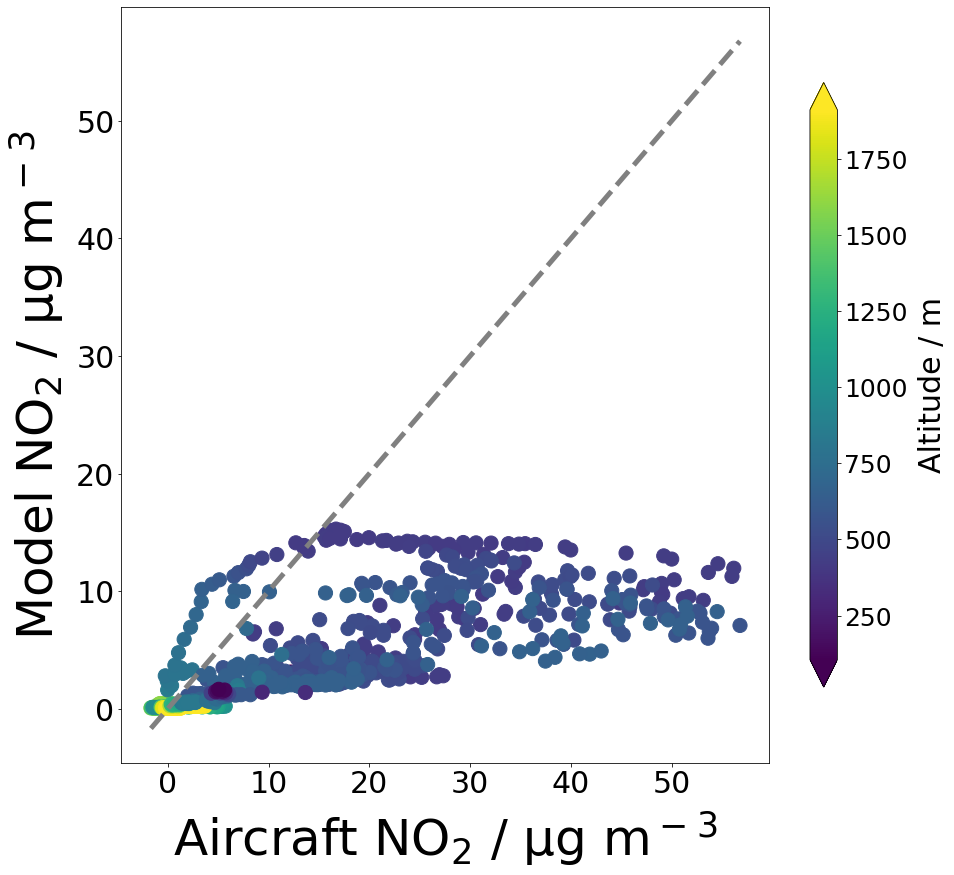

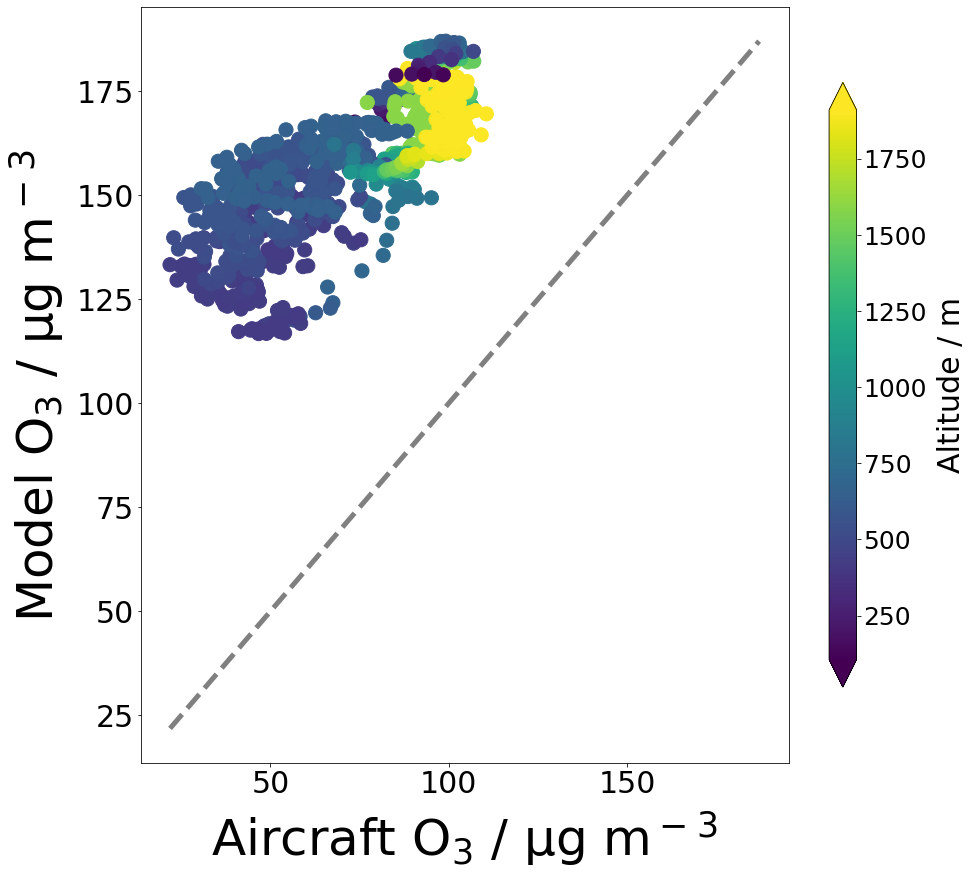

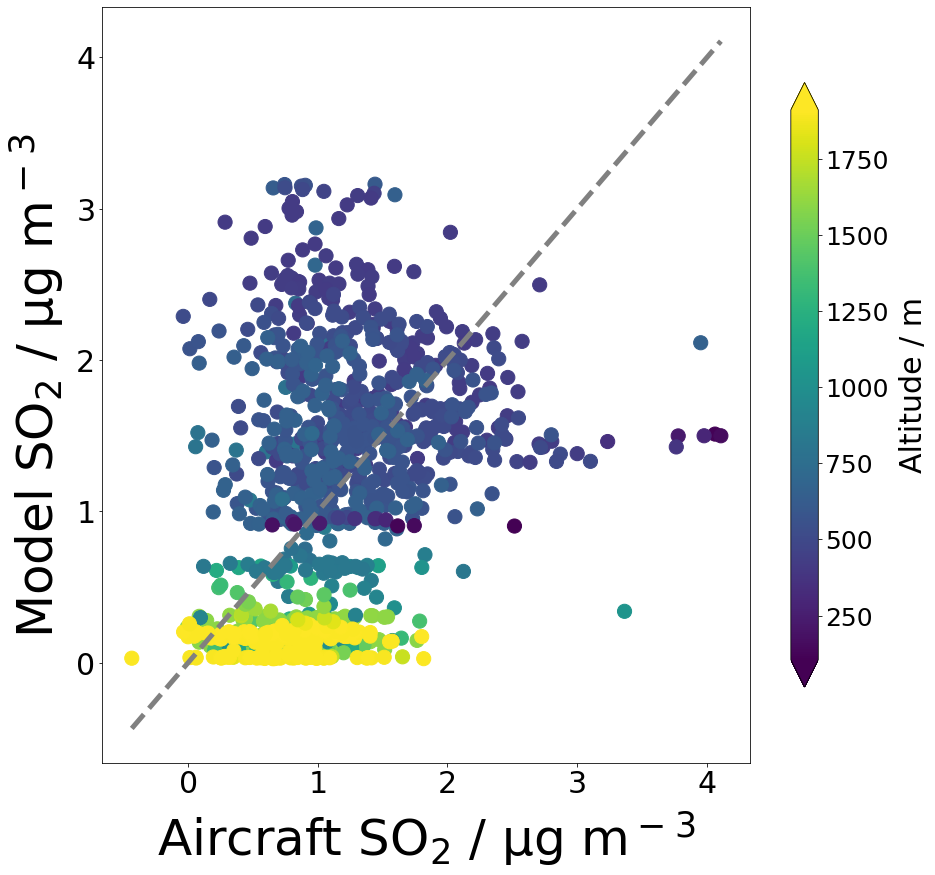

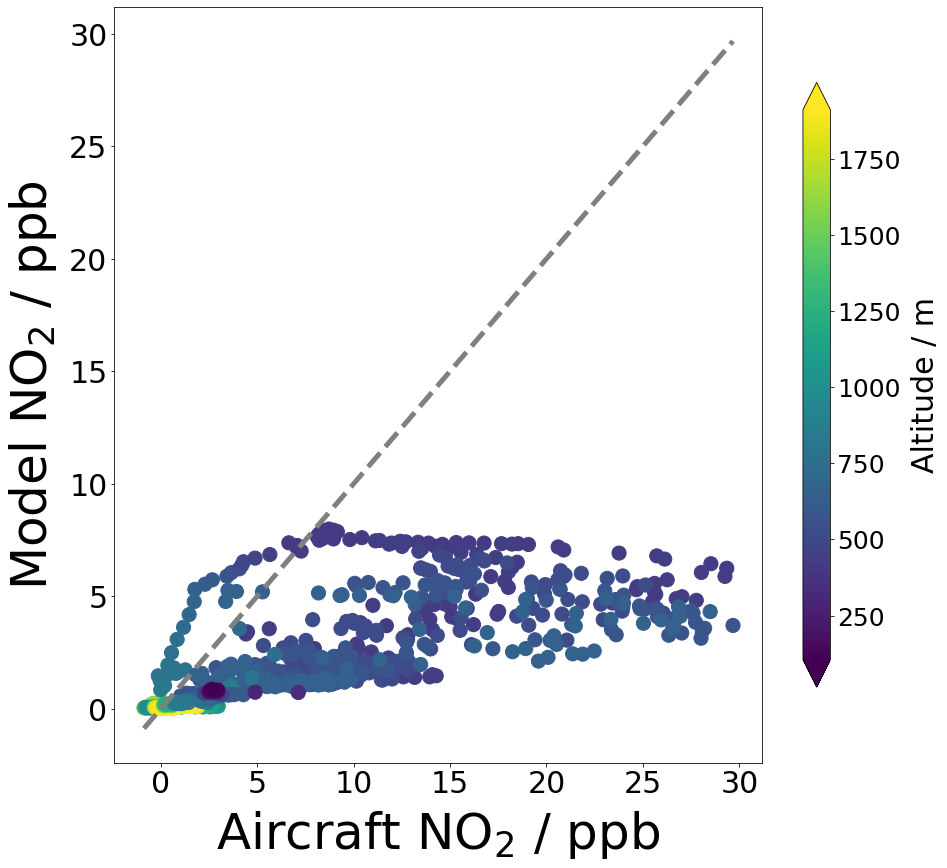

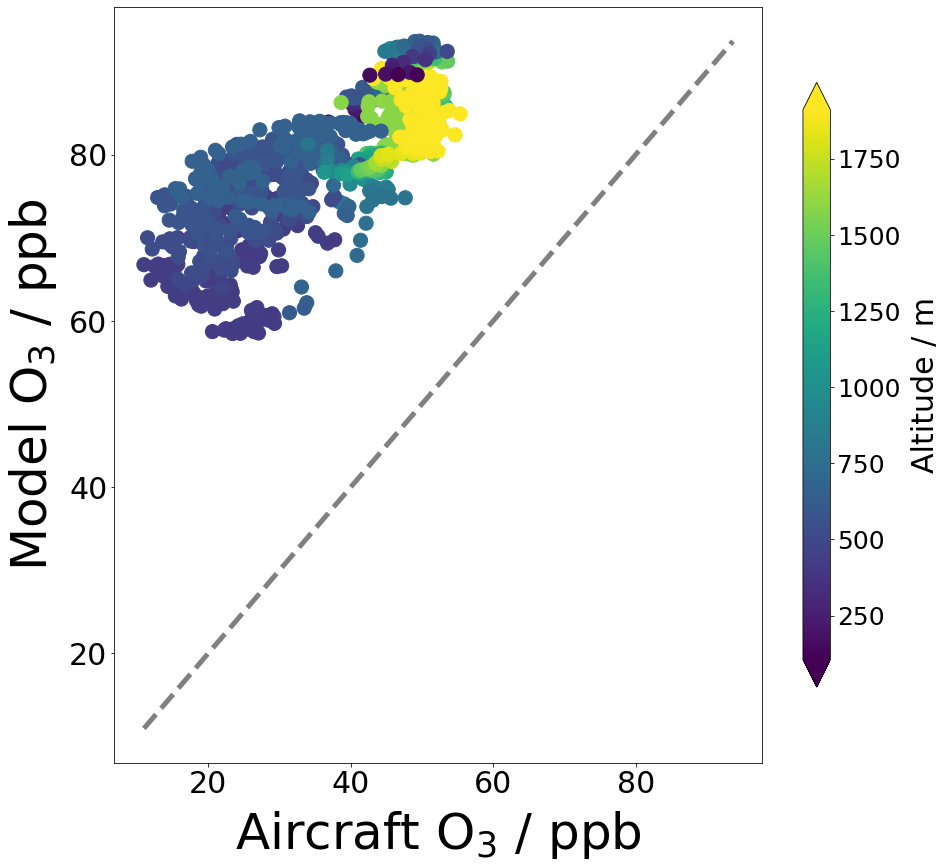

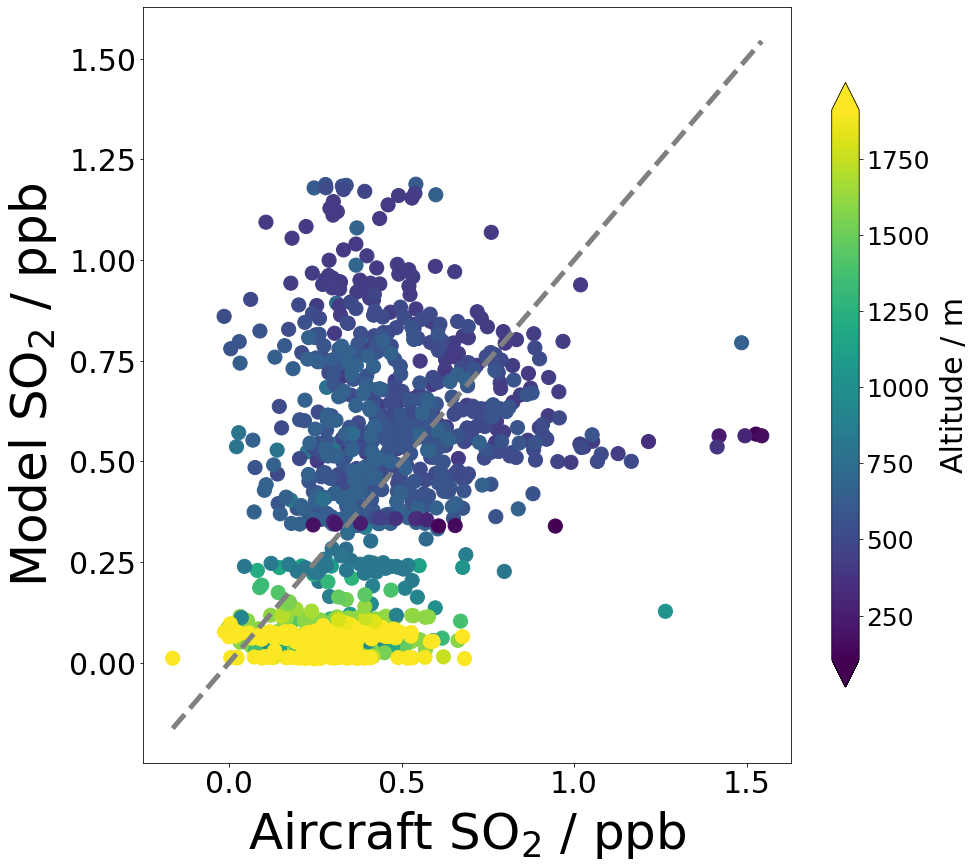

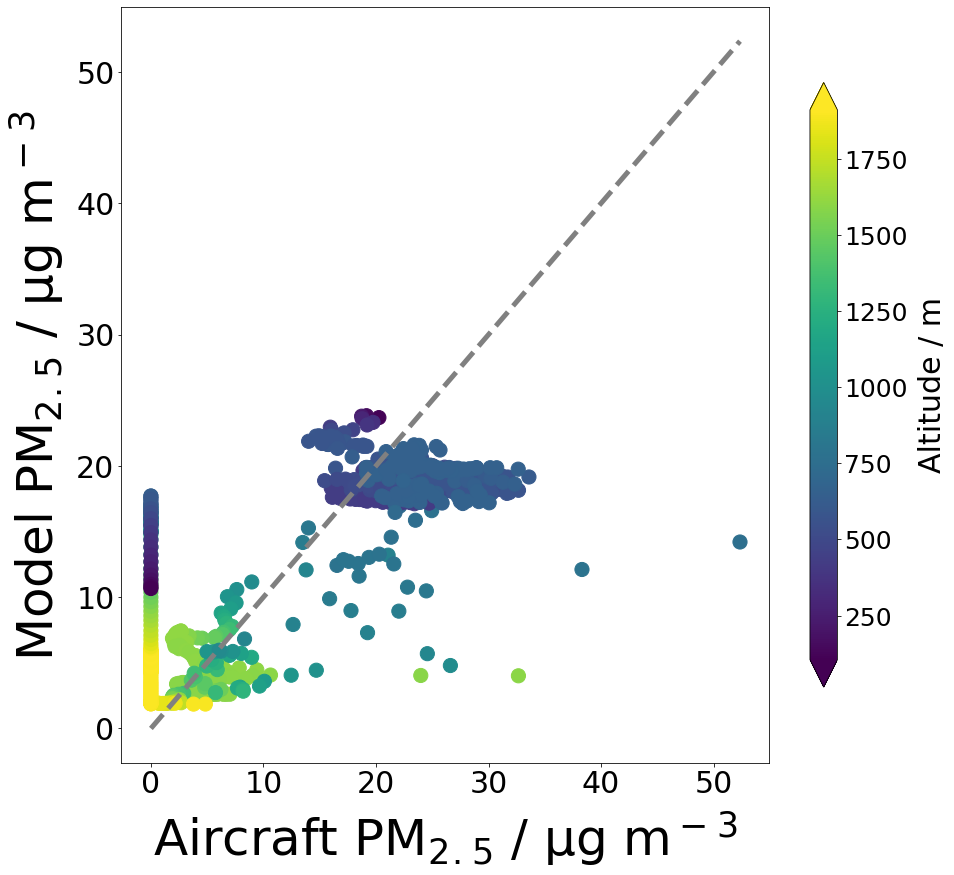

In [4]:
species_dict = pre.species_dictionary()
setup = pre.setup_notebook(flight_number)
optns = setup[6]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'])
    
    plot_correlations(resample_df,setup[5], key,label)